# Central Limit Theorem

building some intuitions on [StatQuest: The Central Limit Theorem](https://youtu.be/YAlJCEDH2uY)

sampling points (at least 30?) from any distribution and taking the mean generate normally distributed values.

In [1]:
import torch as t
import matplotlib.pyplot as plt
%matplotlib inline

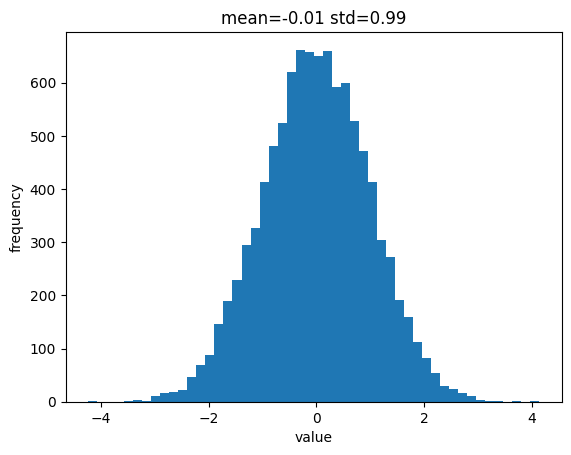

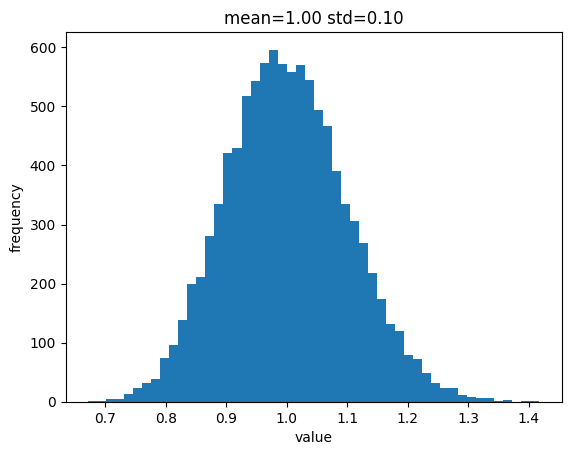

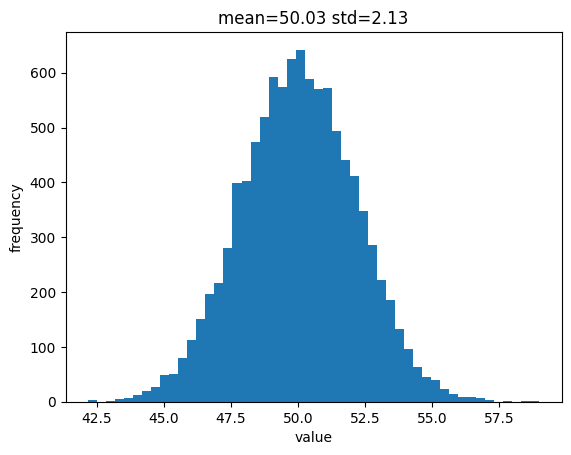

In [26]:
def mean_sample_from_uniform(n_sample=100):
    sample = t.rand(n_sample).mean()
    sample -= 0.5 # center the mean to 0
    sample *= 12**0.5 * n_sample**0.5 # scale the std to 1
    return sample

def mean_sample_from_exponential(n_sample=100):
    sample = t.distributions.exponential.Exponential(1.).sample([n_sample]).mean()
    return sample

def mean_sample_from_bimodal(n_sample=100):
    first = t.randn(n_sample // 2)
    second = t.randn(n_sample // 2) * 30 + 100
    sample = t.cat((first, second)).mean()
    return sample

def dumb_randn(n, distribution=mean_sample_from_uniform):
    samples = [distribution() for _ in range(n)]
    return t.stack(samples)

def plot_points(points, bins=50):
    plt.hist(points, bins=bins)
    plt.title(f'mean={points.mean().item():.2f} std={points.std().item():.2f}')
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.show()

plot_points(dumb_randn(10000, mean_sample_from_uniform))
plot_points(dumb_randn(10000, mean_sample_from_exponential))
plot_points(dumb_randn(10000, mean_sample_from_bimodal))